# Homework 4: Multiple Linear Regression

## MODELADO DE DATOS CON REDES NEURONALES

Professor: Michal Hemmerling \
e-mail: michal.hemmerling@udea.edu.co

Student: Camilo José Torres Castaño \
e-mail: cjose.torres@udea.edu.co \
C.c. 1036401258


# Homework - perform multiple linear regression on the
`FuelConsumption.csv data`
* use follwing features: `['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB'`
* make a two 2D plot of ENGINESIZE vs CO2EMISSIONS and CYLINDERS vs CO2EMISSIONS
* make a 3D plot of ENGINESIZE and CYLINDERS vs CO2EMISSIONS
* apply feature scaling (be able to swith it off and on) (commented or not commented)
* split the data into X_train/y_train and X_test/y_test (80%-20%)
  using `from sklearn.model_selection import train_test_split`
* train the model using X_train data
* evaluate the fit (R-Squared)
* print the metrics MAE, MAPE
* predict CO2 emission of the 10 randomly chosen cars, compare with the true values
* compare results with the simple single feature regression
* write short comments on each step

# Load python libraries

In [1]:
# Import the necessary libraries
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

<h2 id="understanding_data">Understanding the Data</h2>

### `FuelConsumption.csv`:

We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01)

*   **MODELYEAR** e.g. 2014
*   **MAKE** e.g. Acura
*   **MODEL** e.g. ILX
*   **VEHICLE CLASS** e.g. SUV
*   **ENGINE SIZE** e.g. 4.7
*   **CYLINDERS** e.g 6
*   **TRANSMISSION** e.g. A6
*   **FUELTYPE** e.g. z
*   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
*   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
*   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
*   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


<h2 id="reading_data">Reading the data into Pandas</h2>

In [2]:
df = pd.read_csv("FuelConsumption.csv") # Read the data and convert it into a data frame

df.head() # Show the first five rows of the data

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
df.shape # Show the shape of the data

(1067, 13)

Let's select some features that we want to use for regression.


In [4]:
# Select the features that we want to use for the regression
df_multiple = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
df_multiple.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244


In [5]:
df_multiple.shape

(1067, 6)

Let's plot Emission values with respect to Engine size:


<h2 id="reading_data">Visualize the data in 2D</h2>

***ENGINESIZE vs CO2EMISSIONS***

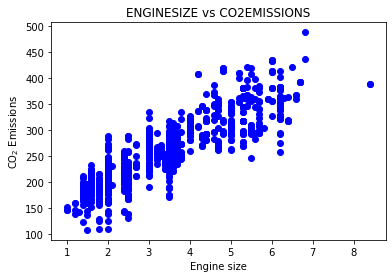

In [6]:
plt.scatter(df_multiple['ENGINESIZE'], df_multiple['CO2EMISSIONS'],  color='blue') # Scatter 2D plot of the data
plt.title("ENGINESIZE vs CO2EMISSIONS")
plt.xlabel("Engine size")
plt.ylabel(r"CO$_{2}$ Emissions")
plt.show()

***CYLINDERS vs CO2EMISSIONS***

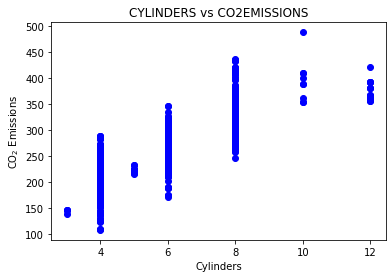

In [7]:
plt.scatter(df_multiple['CYLINDERS'], df_multiple['CO2EMISSIONS'],  color='blue') # Scatter 2D plot of the data
plt.title("CYLINDERS vs CO2EMISSIONS")
plt.xlabel("Cylinders")
plt.ylabel(r"CO$_{2}$ Emissions")
plt.show()

<h2 id="reading_data">Visualize the data in 3D</h2>

***ENGINESIZE and CYLINDERS vs CO2EMISSIONS***

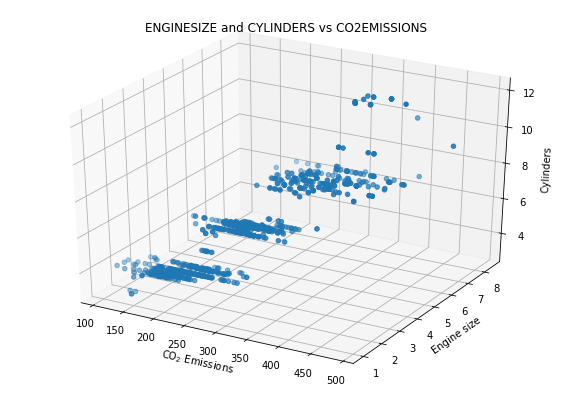

In [8]:
fig = plt.figure(figsize=(10,7))
ax = plt.axes(projection ='3d') # Set a 3D plot

# Set the different axes with the data
x = df_multiple['CO2EMISSIONS']
y = df_multiple['ENGINESIZE']
z = df_multiple['CYLINDERS']
ax.scatter(x, y, z) # Scatter 3D plot of the data

ax.set_xlabel(r"CO$_{2}$ Emissions")
ax.set_ylabel("Engine size")
ax.set_zlabel("Cylinders") 
ax.set_title('ENGINESIZE and CYLINDERS vs CO2EMISSIONS')
plt.show()

# Normalize the data by feature-scaling
* try to make in a way that you can turn it on and off
* if you comment the feature scaling the program should still work

In [9]:
from sklearn import preprocessing # import the pre-processing method to normalice the data

# Function to ask to normalice or not the data set for the multple linear regression
def normalice_data(df, condition):   
    
    if(condition): # If the condition is true, the data is normalized
        df_norm = preprocessing.StandardScaler().fit(df).transform(df)
    else: # Else, the data is not normalized
        df_norm = df.to_numpy()
        
    return df_norm 

In [10]:
#df_mul = normalice_data(df_multiple, True) # To normalice the data set
df_mul = normalice_data(df_multiple, False) # To use the data set without normalization

In [11]:
df_mul

array([[  2. ,   4. ,   9.9,   6.7,   8.5, 196. ],
       [  2.4,   4. ,  11.2,   7.7,   9.6, 221. ],
       [  1.5,   4. ,   6. ,   5.8,   5.9, 136. ],
       ...,
       [  3. ,   6. ,  13.4,   9.8,  11.8, 271. ],
       [  3.2,   6. ,  12.9,   9.3,  11.3, 260. ],
       [  3.2,   6. ,  14.9,  10.2,  12.8, 294. ]])

# Split the data into train and test using scikit-learn

Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set.
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the model. Therefore, it gives us a better understanding of how well our model generalizes on new data.

We know the outcome of each data point in the testing dataset, making it great to test with! Since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

In [12]:
from sklearn.model_selection import train_test_split

X_data = df_mul[:,:-1]
y_data = df_mul[:,-1:]

X_train, X_test, y_train, y_test = train_test_split( X_data, y_data, test_size=0.2)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (853, 5) (853, 1)
Test set: (214, 5) (214, 1)


In [13]:
X_data

array([[ 2. ,  4. ,  9.9,  6.7,  8.5],
       [ 2.4,  4. , 11.2,  7.7,  9.6],
       [ 1.5,  4. ,  6. ,  5.8,  5.9],
       ...,
       [ 3. ,  6. , 13.4,  9.8, 11.8],
       [ 3.2,  6. , 12.9,  9.3, 11.3],
       [ 3.2,  6. , 14.9, 10.2, 12.8]])

In [14]:
y_data

array([[196.],
       [221.],
       [136.],
       ...,
       [271.],
       [260.],
       [294.]])

<h2 id="multiple_regression_model">Train the model using X_train and y_train sets using scikit-learn</h2>


In [15]:
from sklearn import linear_model # Import a linear model from sklearn

model = linear_model.LinearRegression() # Instance a linear model

In [16]:
# fit the data into the model
model.fit(X_train, y_train)

# The coefficients
print ('Coefficients: ', model.coef_)
print ('Intercept: ', model.intercept_)

Coefficients:  [[ 10.55254681   7.87124517 -10.89035115 -10.77155226  30.70973158]]
Intercept:  [66.07336681]


As mentioned before, **Coefficient** and **Intercept**  are the parameters of the fitted line.
Given that it is a multiple linear regression model with 3 parameters and that the parameters are the intercept and coefficients of the hyperplane, sklearn can estimate them from our data. Scikit-learn uses plain Ordinary Least Squares method to solve this problem.

#### Ordinary Least Squares (OLS)

OLS is a method for estimating the unknown parameters in a linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables by minimizing the sum of the squares of the differences between the target dependent variable and those predicted by the linear function. In other words, it tries to minimizes the sum of squared errors (SSE) or mean squared error (MSE) between the target variable (y) and our predicted output ($\hat{y}$) over all samples in the dataset.

OLS can find the best parameters using of the following methods:

*   Solving the model parameters analytically using closed-form equations
*   Using an optimization algorithm (Gradient Descent, Stochastic Gradient Descent, Newton’s Method, etc.)


<h2 id="prediction">Evaluate R2</h2>

In [17]:
R2 = model.score(X_test, y_test) # R-Squared (how good is the fit)

print('R2 =',R2)

R2 = 0.8597823257685456


<h2 id="prediction">Prediction C02 emission from ten random cars</h2>

In [18]:
import random # Import "random" lybrarie

y_pred = model.predict(X_test) # predict the linear regression model with the test data

print("Prediction.   ","Data.")
for i in range(10):
    # Create a randon number between 0 and the number of cars in the test data
    index = random.randint(0, len(X_test)) 
    
    print(y_pred[index],y_test[index])

Prediction.    Data.
[370.52249154] [435.]
[248.72798364] [294.]
[248.72798364] [294.]
[319.37918696] [347.]
[286.85176317] [229.]
[384.69630605] [342.]
[315.8166008] [269.]
[215.69547834] [225.]
[201.1889837] [205.]
[296.57164577] [292.]


<h2 id="prediction">Print the metrics</h2>

* MAE    
* MAPE    
* R-squared    

### MAE

In [19]:
from sklearn.metrics import mean_absolute_error

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_pred- y_test))) # MAE calculated by hand
print("Mean absolute error with Sklearn: %.2f" % mean_absolute_error(y_test, y_pred)) # MAE calculated with Sklearn

Mean absolute error: 18.57
Mean absolute error with Sklearn: 18.57


### MAPE

In [20]:
from sklearn.metrics import mean_absolute_percentage_error # Import MAPE from sklearn

print("Mean absolute error: %.2f" % np.mean(np.absolute((y_pred-y_test)/y_test))) # MAPE calculated by hand
print("Mean absolute error with Sklearn: %.2f" % mean_absolute_percentage_error(y_test, y_pred)) # MAPE calculated with Sklearn

Mean absolute error: 0.07
Mean absolute error with Sklearn: 0.07


### R$^{2}$

In [21]:
from sklearn.metrics import r2_score # Import r2 score from sklearn

print("R2 Score with Sklearn: %.2f" %r2_score(y_test, y_pred))

R2 Score with Sklearn: 0.86


# *Simple Linear Regression*

## Reading the data

In [22]:
# Select the features that we want to use for the simple regression
df_simple = df[['ENGINESIZE','CO2EMISSIONS']]
df_simple.head()

,ENGINESIZE,CO2EMISSIONS
0,2.0,196
1,2.4,221
2,1.5,136
3,3.5,255
4,3.5,244


In [23]:
df_simple.shape

(1067, 2)

## Visualize the data 

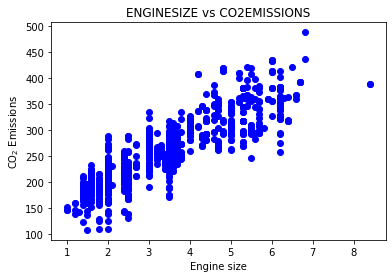

In [24]:
plt.scatter(df_simple['ENGINESIZE'], df_simple['CO2EMISSIONS'],  color='blue') # Scatter 2D plot of the data
plt.title("ENGINESIZE vs CO2EMISSIONS")
plt.xlabel("Engine size")
plt.ylabel(r"CO$_{2}$ Emissions")
plt.show()

## Normalize the data

In [25]:
#df_si = normalice_data(df_simple, True)
df_si = normalice_data(df_simple, False)

df_si

array([[  2. , 196. ],
       [  2.4, 221. ],
       [  1.5, 136. ],
       ...,
       [  3. , 271. ],
       [  3.2, 260. ],
       [  3.2, 294. ]])

## Split the data into train and test using scikit-learn

In [26]:
from sklearn.model_selection import train_test_split

X_data_simple = df_si[:,:1]
y_data_simple = df_si[:,1:]

X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split( X_data_simple, y_data_simple, test_size=0.2)

print ('Train set:', X_train_simple.shape,  y_train_simple.shape)
print ('Test set:', X_test_simple.shape,  y_test_simple.shape)

Train set: (853, 1) (853, 1)
Test set: (214, 1) (214, 1)


<h2 id="multiple_regression_model">Train the model using X_train and y_train sets using scikit-learn</h2>


In [27]:
from sklearn import linear_model # Import a linear model from sklearn

simple_model = linear_model.LinearRegression() # Instance a linear model

In [28]:
# fit the data into the model
simple_model.fit(X_train_simple, y_train_simple)

# The coefficients
print ('Coefficients: ', simple_model.coef_)
print ('Intercept: ', simple_model.intercept_)

Coefficients:  [[39.01950508]]
Intercept:  [126.20518342]


<h2 id="prediction">Evaluate R2</h2>

In [29]:
R2 = simple_model.score(X_test_simple, y_test_simple) # R-Squared (how good is the fit)

print('R2 =',R2)

R2 = 0.7806305696523341


<h2 id="prediction">Prediction C02 emission from ten random cars</h2>

In [30]:
import random # Import "random" lybrarie

y_pred_simple = simple_model.predict(X_test_simple) # predict the linear regression model with the test data

print("Prediction.   ","Data.")
for i in range(10):
    # Create a randon number between 0 and the number of cars in the test data
    index = random.randint(0, len(X_test_simple)) 
    
    print(y_pred_simple[index], y_test_simple[index])

Prediction.    Data.
[204.24419359] [181.]
[266.67540172] [259.]
[180.83249054] [179.]
[204.24419359] [216.]
[368.12611494] [382.]
[321.30270884] [315.]
[270.57735223] [271.]
[387.63586748] [393.]
[270.57735223] [271.]
[321.30270884] [331.]


<h2 id="prediction">Print the metrics</h2>

* MAE    
* MAPE    
* R-squared    

### MAE

In [31]:
from sklearn.metrics import mean_absolute_error

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_pred_simple- y_test_simple))) # MAE calculated by hand
print("Mean absolute error with Sklearn: %.2f" % mean_absolute_error(y_test_simple, y_pred_simple)) # MAE calculated with Sklearn

Mean absolute error: 22.75
Mean absolute error with Sklearn: 22.75


### MAPE

In [32]:
from sklearn.metrics import mean_absolute_percentage_error # Import MAPE from sklearn

print("Mean absolute error: %.2f" % np.mean(np.absolute((y_pred_simple-y_test_simple)/y_test_simple))) # MAPE calculated by hand
print("Mean absolute error with Sklearn: %.2f" % mean_absolute_percentage_error(y_test_simple, y_pred_simple)) # MAPE calculated w

Mean absolute error: 0.10
Mean absolute error with Sklearn: 0.10


### R$^{2}$

In [33]:
from sklearn.metrics import r2_score # Import r2 score from sklearn

print("R2 Score with Sklearn: %.2f" %r2_score(y_test_simple, y_pred_simple))

R2 Score with Sklearn: 0.78


## Compare the Multiple and the Simple Linear Regression

### MAE

In [34]:
print("MAE Multiple Linear Regression: %.2f" % mean_absolute_error(y_test, y_pred)) # MAE calculated with Sklearn
print("MAE Simple Linear Regression: %.2f" % mean_absolute_error(y_test_simple, y_pred_simple)) # MAE calculated with Sklearn

MAE Multiple Linear Regression: 18.57
MAE Simple Linear Regression: 22.75


We can see that the Mean Absolute Error is lower in the multiple linear regression, due to the usage of other features that follow a linear tendencies. 

### MAPE

In [35]:
print("MAPE Multiple Linear Regression: %.2f" % mean_absolute_percentage_error(y_test, y_pred)) # MAE calculated with Sklearn
print("MAPE Simple Linear Regression: %.2f" % mean_absolute_percentage_error(y_test_simple, y_pred_simple)) # MAE calculated with Sklearn

MAPE Multiple Linear Regression: 0.07
MAPE Simple Linear Regression: 0.10


The previous tendency, in the MAE, can be seen in the the Mean Absolute Porcentage Error is lower in the multiple linear regression, due to the usage of other features that follow a linear tendencies. 

### R$^{2}$

In [36]:
print("R2 Multiple Linear Regression: %.2f" %r2_score(y_test, y_pred))
print("R2 Linear Linear Regression: %.2f" %r2_score(y_test_simple, y_pred_simple))

R2 Multiple Linear Regression: 0.86
R2 Linear Linear Regression: 0.78


The $R^{2}$ score is greater in the Multiple Linear Regression, that means that the fit of the regression is better than the Simple Linear Regression. That can be due to the other features.